# Task Uncertainty and Success Rate

## meta-train-taskとmeta-test-task両方のsim_testのログが必要。

In [37]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# with open("logs_penuts/0708-013715_np_45_test_mini/results.pkl", "rb") as f:
with open("./logs/0705-134919_np_emb0_z20_7200_test/results.pkl", "rb") as f:
    results = pickle.load(f)

test_means = np.array([np.squeeze(result['sentence']['mean']) for result in results])
test_stds = np.array([np.squeeze(result['sentence']['stddev']) for result in results])
test_scores = np.array([np.squeeze(result['success']) for result in results])
test_paths = np.array([result['demo_path'] for result in results])
print(test_means.shape, test_stds.shape)

(444, 20) (444, 20)


In [38]:
success = np.split(test_scores, 74)

In [39]:
success = np.array([np.mean(s) for s in success])
print(success)
print(np.where(success==0))

[0.66666667 0.5        0.66666667 0.5        0.83333333 0.66666667
 0.83333333 0.5        1.         1.         0.33333333 0.5
 0.33333333 0.66666667 0.33333333 1.         0.66666667 0.66666667
 1.         1.         1.         0.5        0.66666667 0.5
 0.83333333 0.66666667 0.83333333 1.         0.66666667 0.33333333
 0.66666667 0.5        1.         0.66666667 0.66666667 0.33333333
 1.         0.66666667 0.5        0.66666667 1.         0.83333333
 0.83333333 1.         0.66666667 1.         1.         0.66666667
 0.66666667 0.66666667 0.83333333 0.66666667 0.5        0.5
 0.16666667 0.5        0.33333333 0.16666667 0.         0.66666667
 0.5        0.83333333 0.16666667 0.33333333 1.         0.83333333
 0.83333333 0.83333333 0.33333333 1.         1.         1.
 1.         0.83333333]
(array([58]),)


In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# with open("logs_penuts/0708-020154_np_45_train_mini/results.pkl", "rb") as f:
with open("./logs/0705-160044_np_emb0_z20_7200_train/results.pkl", "rb") as f:
    results = pickle.load(f)

train_means = np.array([np.squeeze(result['sentence']['mean']) for result in results])
train_stds = np.array([np.squeeze(result['sentence']['stddev']) for result in results])
train_scores = np.array([np.squeeze(result['success']) for result in results])
train_paths = np.array([result['demo_path'] for result in results])
print(train_means.shape, train_stds.shape)

(769, 20) (769, 20)


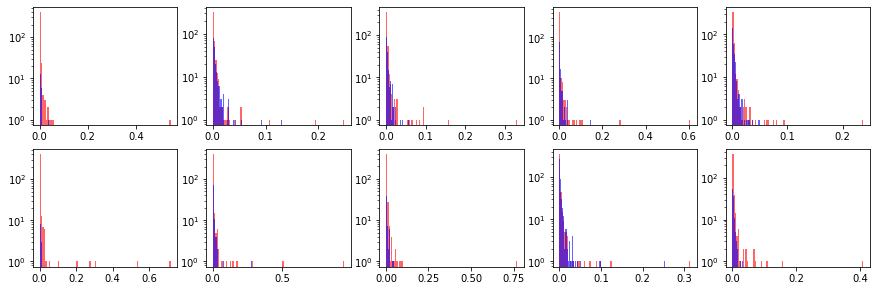

In [41]:
plt.figure(figsize=(15,10))
for d in range(10):
    plt.subplot(4,5,1+d)
    plt.hist(test_stds[:444,d], bins=100, color="r", alpha=0.6); plt.yscale("log")
    plt.hist(train_stds[:444,d], bins=100, color="b", alpha=0.6); plt.yscale("log")
plt.show()

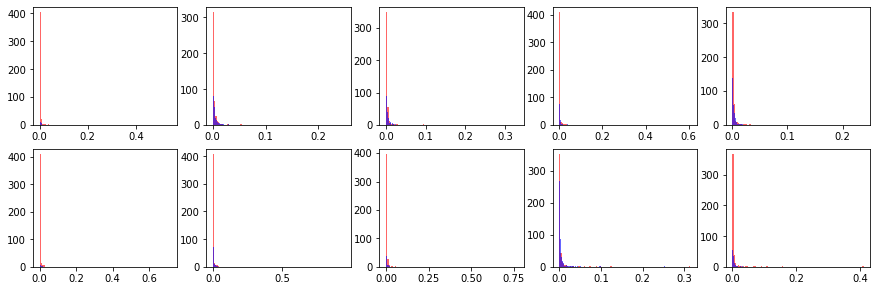

In [42]:
plt.figure(figsize=(15,10))
for d in range(10):
    plt.subplot(4,5,1+d)
    plt.hist(test_stds[:444,d], bins=100, color="r", alpha=0.6)
    plt.hist(train_stds[:444,d], bins=100, color="b", alpha=0.6)
plt.show()

In [43]:
train_stds

array([[0.01051625, 0.01101127, 0.00729419, ..., 0.01225715, 0.03064026,
        0.02945177],
       [0.00404795, 0.0019777 , 0.01173011, ..., 0.00326745, 0.00566751,
        0.00269138],
       [0.01488708, 0.00283044, 0.0235815 , ..., 0.01251989, 0.00060248,
        0.01593866],
       ...,
       [0.00087463, 0.00054218, 0.00100143, ..., 0.00167859, 0.00433236,
        0.00080823],
       [0.0022738 , 0.00064354, 0.00075066, ..., 0.00146439, 0.00072559,
        0.00201968],
       [0.00023891, 0.00022768, 0.00015102, ..., 0.00052726, 0.00039651,
        0.0005299 ]], dtype=float32)

In [50]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.01, kernel='linear') # nu=0.01~0.05
clf.fit(np.log(train_stds))

print("train")
# train_pred = clf.predict(train_stds)
train_pred = clf.predict(np.log(train_stds))
print(sum(train_pred == 1)/769)
print(len(train_scores[train_pred==1]), len(train_scores[train_pred==-1]))
print(np.mean(train_scores[train_pred==1]), np.mean(train_scores[train_pred==-1]))
print()

print("test")
# test_pred = clf.predict(test_stds)
test_pred = clf.predict(np.log(test_stds))
print(sum(test_pred == 1)/769)
print(len(test_scores[test_pred==1]), len(test_scores[test_pred==-1]))
print(np.mean(test_scores[test_pred==1]), np.mean(test_scores[test_pred==-1]))
print()

train
0.9895968790637191
761 8
0.7634691195795007 0.75

test
0.5604681404421327
431 13
0.6844547563805105 0.6153846153846154



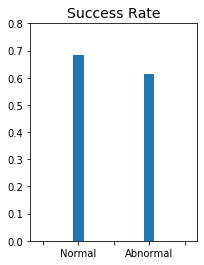

In [51]:
a = np.mean(test_scores[test_pred==1])
b = np.mean(test_scores[test_pred==-1])

plt.figure(figsize=(3,4)); plt.title("Success Rate", fontsize=14)
plt.ylim([0,0.8])
plt.bar(["", "Normal","  ", "Abnormal", " "], [0, a,0, b, 0], width=0.3, align="center"); plt.show()

## 1つ以上の要素で必ず分散が大きくなっていることを確認。

In [52]:
(test_stds[test_pred==-1] - test_stds.mean(0)).max(1)

array([0.2718314 , 0.12516266, 0.26023626, 0.20774217, 0.18963961,
       0.24844098, 0.5293184 , 0.95493287, 0.07457595, 0.25062755,
       0.1593556 , 0.33658224, 0.9361364 ], dtype=float32)

In [53]:
(train_stds[train_pred==-1] - train_stds.mean(0)).max(1)

array([0.27575293, 0.20086986, 0.24949184, 0.19227572, 0.10279831,
       0.26612294, 0.0921471 , 0.23695758], dtype=float32)

## 異常とみなされたデモ

In [54]:
train_paths[train_pred==-1]

array(['/root/matsushima/data_mini/sim_push/object_104/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_179/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_215/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_453/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_462/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_498/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_568/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push/object_736/cond9.samp0.gif'],
      dtype='<U62')

In [55]:
test_paths[test_pred==-1]

array(['/root/matsushima/data_mini/sim_push_test/object_8/cond10.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_9/cond12.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_23/cond13.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_39/cond10.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_43/cond11.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_49/cond14.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_65/cond14.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_66/cond11.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_68/cond10.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_71/cond11.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_76/cond13.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_83/cond9.samp0.gif',
       '/root/matsushima/data_mini/sim_push_test/object_83/cond13.s